# Hands-On Exercise 3: Build a Defect Prediction System

## Task

📚 Use the `EclipseJDTCore_final.csv` file provided with this task to build an ML model predicting the presence of bugs in the code at any class level.

💻 Use the random forest classifier to train the model.

🔧 Try to find the optimal combination of input features and their quantity.

🧮 Evaluate the model by calculating accuracy, precision, recall, and the F1-score.

## A Possible Solution

### Step 1 - Setting up the environment

📚 Prior to developing the model, import the Python libraries that will be used for the task:
- `drive` will help you operate data directly from your cloud storage
- `files` will help you operate data from the upload dialog window
- `pandas` will help you work with table-formatted data
- `sklearn` will help you break the data into training and test datasets, train a random forest model, plot the confusion matrix, and calculate the accuracy, precision, recall and F1-score
- `matplotlib` and `seaborn` will help with visualisation

In [ ]:
# Import the Python module to work with dataframes
import pandas as pd
# Import the module for splitting the data into the training/test sets
from sklearn.model_selection import train_test_split
# Import the module to build a random forest classification model
from sklearn.ensemble import RandomForestClassifier
# Import the module for calculating accuracy
from sklearn.metrics import accuracy_score
# Import the module for calculating precision
from sklearn.metrics import precision_score
# Import the module for calculating recall
from sklearn.metrics import recall_score
# Import the module for calculating F1-score
from sklearn.metrics import f1_score
# Import the module for calculating the confusion matrix
from sklearn.metrics import confusion_matrix
# Import for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Mount your Google Drive to easily access the files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import to interact with files in the Google Colab environment (if needed)
from google.colab import files

❗ **NB: If you have no problems with mounting your Google Drive, then proceed to the Step 2.1. If you do encounter problems, then proceed to the Step 2.2.**

### Step 2 - Data acquisition

#### Step 2.1 - File upload via accessing the Google Drive

In [ ]:
# Create a dataframe by reading the file
df = pd.read_csv('EclipseJDTCore_final.csv')
# Check the dataframe
df

,classname,numberOfVersionsUntil,numberOfFixesUntil,numberOfRefactoringsUntil,numberOfAuthorsUntil,linesAddedUntil,maxLinesAddedUntil,avgLinesAddedUntil,linesRemovedUntil,maxLinesRemovedUntil,...,numberOfAttributesInherited,numberOfLinesOfCode,numberOfMethods,numberOfMethodsInherited,numberOfPrivateAttributes,numberOfPrivateMethods,numberOfPublicAttributes,numberOfPublicMethods,rfc,wmc
0,org::eclipse::jdt::internal::core::search::ind...,65,4,0,8,608.0,158.0,9.35385,566.0,158.0,...,8,122.0,6.0,19,0,0,1.0,5,34.0,20.0
1,org::eclipse::jdt::internal::compiler::codegen...,2,0,0,2,10.0,10.0,5.00000,0.0,0.0,...,0,4.0,1.0,8,0,0,2.0,1,1.0,1.0
2,org::eclipse::jdt::internal::compiler::ast::AS...,120,10,0,12,1361.0,99.0,11.34170,768.0,77.0,...,249,484.0,20.0,8,0,1,3.0,19,156.0,176.0
3,org::eclipse::jdt::internal::compiler::lookup:...,28,4,0,5,138.0,39.0,4.92857,123.0,39.0,...,61,33.0,5.0,207,0,0,0.0,4,18.0,12.0
4,org::eclipse::jdt::internal::eval::CodeSnippet...,93,17,0,8,1870.0,684.0,20.10750,1881.0,692.0,...,416,673.0,41.0,8,0,2,7.0,1,174.0,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,org::eclipse::jdt::internal::compiler::codegen...,58,14,0,6,1017.0,246.0,17.53450,1267.0,281.0,...,0,3.0,2.0,8,0,0,2.0,2,2.0,1.0
993,org::eclipse::jdt::internal::compiler::ast::Ja...,35,5,0,9,322.0,48.0,9.20000,156.0,31.0,...,386,48.0,6.0,95,0,1,3.0,3,27.0,14.0
994,org::eclipse::jdt::internal::core::search::mat...,34,5,0,7,690.0,119.0,20.29410,319.0,84.0,...,52,306.0,18.0,27,2,0,6.0,6,94.0,88.0
995,org::eclipse::jdt::core::dom::RecoveredVariabl...,3,3,0,1,32.0,27.0,10.66670,3.0,2.0,...,6,87.0,20.0,30,2,0,0.0,19,47.0,29.0


#### Step 2.2 - File upload from the local file system (in case you have problems mounting the Google Drive)

In [ ]:
uploaded = files.upload() # Running this opens the File Upload dialog window

In [ ]:
# Create a dataframe by reading the file
df = pd.read_csv('EclipseJDTCore_final.csv')
# Check the dataframe
df

#### Step 2.3 - Information about the DataFrame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   classname                    997 non-null    object 
 1   numberOfVersionsUntil        997 non-null    int64  
 2   numberOfFixesUntil           997 non-null    int64  
 3   numberOfRefactoringsUntil    997 non-null    int64  
 4   numberOfAuthorsUntil         997 non-null    int64  
 5   linesAddedUntil              997 non-null    float64
 6   maxLinesAddedUntil           997 non-null    float64
 7   avgLinesAddedUntil           997 non-null    float64
 8   linesRemovedUntil            997 non-null    float64
 9   maxLinesRemovedUntil         997 non-null    float64
 10  avgLinesRemovedUntil         997 non-null    float64
 11  codeChurnUntil               997 non-null    float64
 12  maxCodeChurnUntil            997 non-null    float64
 13  avgCodeChurnUntil   

### Step 3 - Data pre-processing

Add a new column named `hasBugs` to indicate whether the class contains any bugs. If there is at least one non-zero value in the column named `bugs`, `nonTrivialBugs`, `majorBugs`, `criticalBugs` or `highPriorityBugs`, then `hasBugs` is True.

In [ ]:
df['hasBugs'] = [bool(sum([df['bugs'][i], df['nonTrivialBugs'][i], df['majorBugs'][i],
                           df['criticalBugs'][i], df['highPriorityBugs'][i]])) for i in range(len(df))]
df[['classname', 'bugs', 'nonTrivialBugs','majorBugs', 'criticalBugs', 'highPriorityBugs', 'hasBugs']]

,classname,bugs,nonTrivialBugs,majorBugs,criticalBugs,highPriorityBugs,hasBugs
0,org::eclipse::jdt::internal::core::search::ind...,0,0,0,0,0,False
1,org::eclipse::jdt::internal::compiler::codegen...,0,0,0,0,0,False
2,org::eclipse::jdt::internal::compiler::ast::AS...,1,0,0,0,0,True
3,org::eclipse::jdt::internal::compiler::lookup:...,0,0,0,0,0,False
4,org::eclipse::jdt::internal::eval::CodeSnippet...,0,0,0,0,0,False
...,...,...,...,...,...,...,...
992,org::eclipse::jdt::internal::compiler::codegen...,0,0,0,0,0,False
993,org::eclipse::jdt::internal::compiler::ast::Ja...,0,0,0,0,0,False
994,org::eclipse::jdt::internal::core::search::mat...,1,0,0,0,0,True
995,org::eclipse::jdt::core::dom::RecoveredVariabl...,0,0,0,0,0,False


## Option 1 for selecting the input features

### Step 4 - Feature engineering

In [ ]:
# Select the target variable
target_variable = 'hasBugs'
# Select the features
features = ['numberOfLinesOfCode', 'numberOfAuthorsUntil', 'numberOfFixesUntil']

In [ ]:
# Check the features and the target variable
df[[*features, target_variable]]

,numberOfLinesOfCode,numberOfAuthorsUntil,numberOfFixesUntil,hasBugs
0,122.0,8,4,False
1,4.0,2,0,False
2,484.0,12,10,True
3,33.0,5,4,False
4,673.0,8,17,False
...,...,...,...,...
992,3.0,6,14,False
993,48.0,9,5,False
994,306.0,7,5,True
995,87.0,1,3,False


### Step 5 - Split the dataset into the training and test sets

In [ ]:
# Set a ratio of 30% for the test dataset
test_size = 0.3
# Set a seed for the random number generator
seed = 40

# Use the 'stratify' parameter to ensure the target variable's class distribution
# is maintained in both the training and test sets
#
# Use the 'random_state' parameter to ensure that the same randomisation is used
# each time you run the code, resulting in the same splits of the data
X_train, X_test, y_train, y_test  = train_test_split(df[features], df[target_variable],
                                                     test_size=test_size,
                                                     stratify=df[target_variable],
                                                     random_state = seed)

### Step 6 - Train ML model

Use a random forest classifier.

In [ ]:
# Initialise the random forest classifier
clf = RandomForestClassifier(n_estimators=30)
# Train the classifier on the training data
clf = clf.fit(X_train, y_train)

### Step 7 - Make predictions

In [ ]:
# Prediction for the training dataset
y_pred_train=clf.predict(X_train)
# Prediction for the test dataset
y_pred_test=clf.predict(X_test)

### Step 8 - Evaluate the model

In [ ]:
# Calculate the train accuracy, precision, recall and F1-score
print(f'X_train: Accuracy = {accuracy_score(y_train, y_pred_train):.2f}, '\
      f'Precision = {precision_score(y_train, y_pred_train):.2f}, '\
      f'Recall = {recall_score(y_train, y_pred_train):.2f}, '\
      f'F1-score = {f1_score(y_train, y_pred_train):.2f}')
# Calculate the test accuracy, precision, recall and F1-score
print(f'X_test: Accuracy = {accuracy_score(y_test, y_pred_test):.2f}, '\
      f'Precision = {precision_score(y_test, y_pred_test):.2f}, '\
      f'Recall = {recall_score(y_test, y_pred_test):.2f}, '\
      f'F1-score = {f1_score(y_test, y_pred_test):.2f}')

X_train: Accuracy = 0.99, Precision = 1.00, Recall = 0.93, F1-score = 0.96
X_test: Accuracy = 0.84, Precision = 0.65, Recall = 0.48, F1-score = 0.56


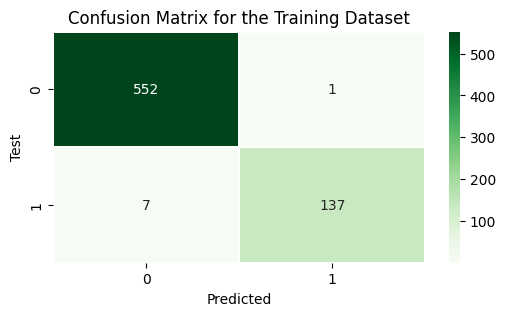

In [ ]:
# Calculate the confusion matrix for the training dataset
conf_matrix = confusion_matrix(y_train, y_pred_train)
# Plot the confusion matrix for the training dataset
plt.figure(figsize=(6, 3))
sns.heatmap(conf_matrix, annot=True, cmap='Greens',
            linewidths=0.2, fmt='d')
plt.title('Confusion Matrix for the Training Dataset')
plt.xlabel('Predicted')
plt.ylabel('Test')
plt.show()

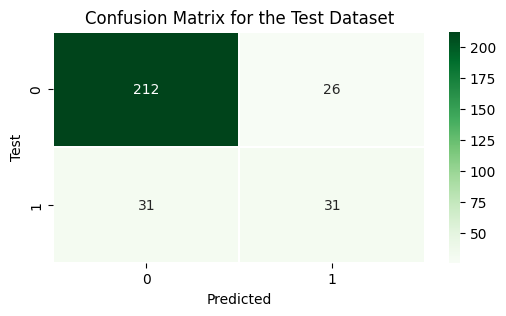

In [ ]:
# Calculate the confusion matrix for the test dataset
conf_matrix = confusion_matrix(y_test, y_pred_test)
# Plot the confusion matrix for the test dataset
plt.figure(figsize=(6, 3))
sns.heatmap(conf_matrix, annot=True, cmap='Greens',
            linewidths=0.2, fmt='d')
plt.title('Confusion Matrix for the Test Dataset')
plt.xlabel('Predicted')
plt.ylabel('Test')
plt.show()

## Option 2 for selecting the input features

### Step 4 - Feature engineering

In [ ]:
# Select the features
features = ['numberOfLinesOfCode', 'linesRemovedUntil', 'numberOfAuthorsUntil',
            'numberOfFixesUntil', 'numberOfMethods', 'wmc']

In [ ]:
# Check the features and the target variable
df[[*features, target_variable]]

,numberOfLinesOfCode,linesRemovedUntil,numberOfAuthorsUntil,numberOfFixesUntil,numberOfMethods,wmc,hasBugs
0,122.0,566.0,8,4,6.0,20.0,False
1,4.0,0.0,2,0,1.0,1.0,False
2,484.0,768.0,12,10,20.0,176.0,True
3,33.0,123.0,5,4,5.0,12.0,False
4,673.0,1881.0,8,17,41.0,115.0,False
...,...,...,...,...,...,...,...
992,3.0,1267.0,6,14,2.0,1.0,False
993,48.0,156.0,9,5,6.0,14.0,False
994,306.0,319.0,7,5,18.0,88.0,True
995,87.0,3.0,1,3,20.0,29.0,False


### Step 5 - Split the dataset into the training and test sets

In [ ]:
# Use the 'stratify' parameter to ensure the target variable's class distribution
# is maintained in both the training and test sets
#
# Use the 'random_state' parameter to ensure that the same randomisation is used
# each time you run the code, resulting in the same splits of the data
X_train, X_test, y_train, y_test  = train_test_split(df[features], df[target_variable],
                                                     test_size=test_size,
                                                     stratify=df[target_variable],
                                                     random_state = seed)

### Step 6 - Train ML model

Use a random forest classifier.

In [ ]:
# Train the classifier on the training data
clf = clf.fit(X_train, y_train)

### Step 7 - Make predictions

In [ ]:
# Prediction for the training dataset
y_pred_train=clf.predict(X_train)
# Prediction for the test dataset
y_pred_test=clf.predict(X_test)

### Step 8 - Evaluate the model

In [ ]:
# Calculate the train accuracy, precision, recall and F1-score
print(f'X_train: Accuracy = {accuracy_score(y_train, y_pred_train):.2f}, '\
      f'Precision = {precision_score(y_train, y_pred_train):.2f}, '\
      f'Recall = {recall_score(y_train, y_pred_train):.2f}, '\
      f'F1-score = {f1_score(y_train, y_pred_train):.2f}')
# Calculate the test accuracy, precision, recall and F1-score
print(f'X_test: Accuracy = {accuracy_score(y_test, y_pred_test):.2f}, '\
      f'Precision = {precision_score(y_test, y_pred_test):.2f}, '\
      f'Recall = {recall_score(y_test, y_pred_test):.2f}, '\
      f'F1-score = {f1_score(y_test, y_pred_test):.2f}')

X_train: Accuracy = 0.99, Precision = 1.00, Recall = 0.97, F1-score = 0.99
X_test: Accuracy = 0.83, Precision = 0.62, Recall = 0.50, F1-score = 0.55


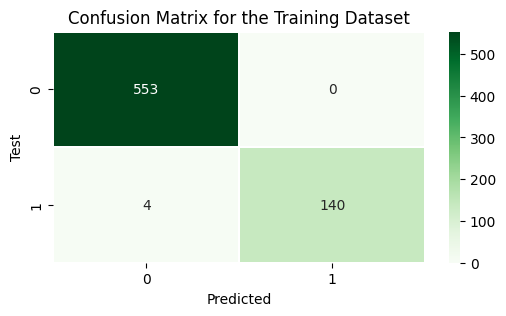

In [ ]:
# Calculate the confusion matrix for the training dataset
conf_matrix = confusion_matrix(y_train, y_pred_train)
# Plot the confusion matrix for the training dataset
plt.figure(figsize=(6, 3))
sns.heatmap(conf_matrix, annot=True, cmap='Greens',
            linewidths=0.2, fmt='d')
plt.title('Confusion Matrix for the Training Dataset')
plt.xlabel('Predicted')
plt.ylabel('Test')
plt.show()

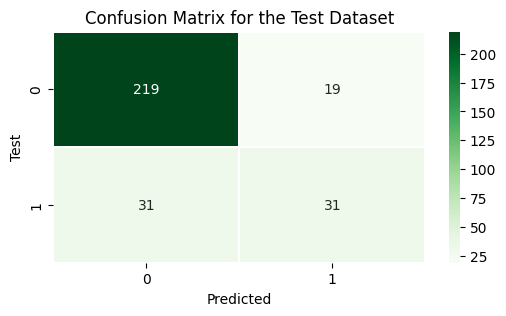

In [ ]:
# Calculate the confusion matrix for the test dataset
conf_matrix = confusion_matrix(y_test, y_pred_test)
# Plot the confusion matrix for the test dataset
plt.figure(figsize=(6, 3))
sns.heatmap(conf_matrix, annot=True, cmap='Greens',
            linewidths=0.2, fmt='d')
plt.title('Confusion Matrix for the Test Dataset')
plt.xlabel('Predicted')
plt.ylabel('Test')
plt.show()

## Option 3 for selecting the input features

### Step 4 - Feature engineering

In [ ]:
# Select the features
features = ['numberOfVersionsUntil', 'numberOfFixesUntil', 'numberOfMethods',
            'fanIn', 'numberOfLinesOfCode', 'linesRemovedUntil', 'numberOfAuthorsUntil',
            'wmc', 'fanOut', 'ageWithRespectTo']

In [ ]:
# Check the features and the target variable
df[[*features, target_variable]]

,numberOfVersionsUntil,numberOfFixesUntil,numberOfMethods,fanIn,numberOfLinesOfCode,linesRemovedUntil,numberOfAuthorsUntil,wmc,fanOut,ageWithRespectTo,hasBugs
0,65,4,6.0,1,122.0,566.0,8,20.0,9,350.5710,False
1,2,0,1.0,1,4.0,0.0,2,1.0,0,117.7140,False
2,120,10,20.0,102,484.0,768.0,12,176.0,18,238.4290,True
3,28,4,5.0,1,33.0,123.0,5,12.0,4,367.0000,False
4,93,17,41.0,1,673.0,1881.0,8,115.0,22,367.0000,False
...,...,...,...,...,...,...,...,...,...,...,...
992,58,14,2.0,0,3.0,1267.0,6,1.0,0,367.0000,False
993,35,5,6.0,2,48.0,156.0,9,14.0,7,239.1430,False
994,34,5,18.0,25,306.0,319.0,7,88.0,10,216.0000,True
995,3,3,20.0,0,87.0,3.0,1,29.0,7,65.7143,False


### Step 5 - Split the dataset into the training and test sets

In [ ]:
# Use the 'stratify' parameter to ensure the target variable's class distribution
# is maintained in both the training and test sets
#
# Use the 'random_state' parameter to ensure that the same randomisation is used
# each time you run the code, resulting in the same splits of the data
X_train, X_test, y_train, y_test  = train_test_split(df[features], df[target_variable],
                                                     test_size=test_size,
                                                     stratify=df[target_variable],
                                                     random_state = seed)

### Step 6 - Train ML model

Use a random forest classifier.

In [ ]:
# Train the classifier on the training data
clf = clf.fit(X_train, y_train)

### Step 7 - Make predictions

In [ ]:
# Prediction for the training dataset
y_pred_train=clf.predict(X_train)
# Prediction for the test dataset
y_pred_test=clf.predict(X_test)

### Step 8 - Evaluate the model

In [ ]:
# Calculate the train accuracy, precision, recall and F1-score
print(f'X_train: Accuracy = {accuracy_score(y_train, y_pred_train):.2f}, '\
      f'Precision = {precision_score(y_train, y_pred_train):.2f}, '\
      f'Recall = {recall_score(y_train, y_pred_train):.2f}, '\
      f'F1-score = {f1_score(y_train, y_pred_train):.2f}')
# Calculate the test accuracy, precision, recall and F1-score
print(f'X_test: Accuracy = {accuracy_score(y_test, y_pred_test):.2f}, '\
      f'Precision = {precision_score(y_test, y_pred_test):.2f}, '\
      f'Recall = {recall_score(y_test, y_pred_test):.2f}, '\
      f'F1-score = {f1_score(y_test, y_pred_test):.2f}')

X_train: Accuracy = 1.00, Precision = 1.00, Recall = 0.98, F1-score = 0.99
X_test: Accuracy = 0.86, Precision = 0.71, Recall = 0.56, F1-score = 0.63


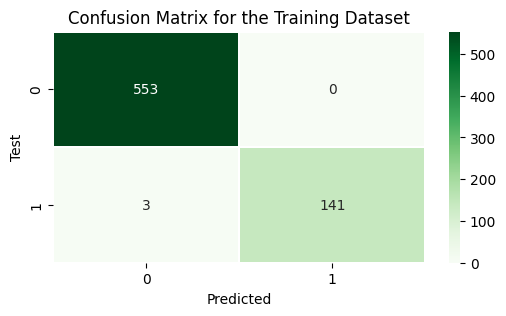

In [ ]:
# Calculate the confusion matrix for the training dataset
conf_matrix = confusion_matrix(y_train, y_pred_train)
# Plot the confusion matrix for the training dataset
plt.figure(figsize=(6, 3))
sns.heatmap(conf_matrix, annot=True, cmap='Greens',
            linewidths=0.2, fmt='d')
plt.title('Confusion Matrix for the Training Dataset')
plt.xlabel('Predicted')
plt.ylabel('Test')
plt.show()

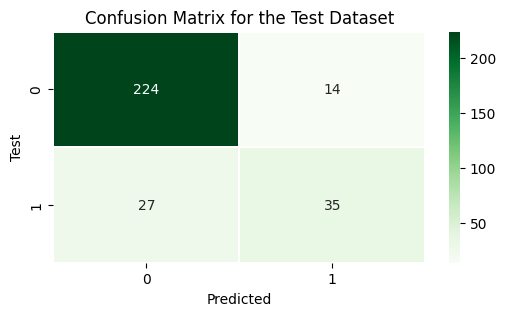

In [ ]:
# Calculate the confusion matrix for the test dataset
conf_matrix = confusion_matrix(y_test, y_pred_test)
# Plot the confusion matrix for the training dataset
plt.figure(figsize=(6, 3))
sns.heatmap(conf_matrix, annot=True, cmap='Greens',
            linewidths=0.2, fmt='d')
plt.title('Confusion Matrix for the Test Dataset')
plt.xlabel('Predicted')
plt.ylabel('Test')
plt.show()

***Comments on the observed results:***

> The selection of features has a significant impact on the prediction results. The defect prediction model for the 3rd option of input features is more accurate if compared with the models build for the 1st and the 2nd options.